In [2]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
import re

[**Kaggle Dataset**](https://www.kaggle.com/datasets/parasharmanas/movie-recommendation-system/data)

In [3]:
movies = pd.read_csv("Datasets/movies.csv")
ratings = pd.read_csv("Datasets/ratings.csv")

In [4]:
movies

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy
...,...,...,...
62418,209157,We (2018),Drama
62419,209159,Window of the Soul (2001),Documentary
62420,209163,Bad Poems (2018),Comedy|Drama
62421,209169,A Girl Thing (2001),(no genres listed)


In [5]:
def Extract_Year(String:str):
    try:
        return int(re.findall(pattern=r"(\d+)",string=String)[0])
    except IndexError: 
        return 0

In [6]:
def clean_title(String:str):
        return re.sub(pattern=r"[(\d+)]",repl="",string=String)

In [7]:
movies["Year"] = movies.apply(lambda x:Extract_Year(x["title"]),axis=1)

In [8]:
movies["title"] = movies.apply(lambda x:clean_title(x["title"]),axis=1)

In [9]:
movies

,movieId,title,genres,Year
0,1,Toy Story,Adventure|Animation|Children|Comedy|Fantasy,1995
1,2,Jumanji,Adventure|Children|Fantasy,1995
2,3,Grumpier Old Men,Comedy|Romance,1995
3,4,Waiting to Exhale,Comedy|Drama|Romance,1995
4,5,Father of the Bride Part II,Comedy,1995
...,...,...,...,...
62418,209157,We,Drama,2018
62419,209159,Window of the Soul,Documentary,2001
62420,209163,Bad Poems,Comedy|Drama,2018
62421,209169,A Girl Thing,(no genres listed),2001


In [10]:
movies[movies["Year"]==0]

,movieId,title,genres,Year
6423,6546,Km. - Kilometer Zero Kilómetro cero,Comedy|Drama,0
9815,32743,Ringu : Bâsudei,Drama|Horror|Thriller,0
15036,79607,"Millions Game, The Das Millionenspiel",Action|Drama|Sci-Fi|Thriller,0
25387,123619,Terrible Joe Moran,(no genres listed),0
26284,125571,The Court-Martial of Jackie Robinson,(no genres listed),0
...,...,...,...,...
62071,207714,Tales of Found Footage,(no genres listed),0
62104,207884,Enduring Destiny,(no genres listed),0
62285,208597,Punk the Capital: Building a Sound Movement,Documentary,0
62326,208763,Yosemite: The Fate of Heaven,(no genres listed),0


In [11]:
ratings

,userId,movieId,rating,timestamp
0,1,296,5.0,1147880044
1,1,306,3.5,1147868817
2,1,307,5.0,1147868828
3,1,665,5.0,1147878820
4,1,899,3.5,1147868510
...,...,...,...,...
25000090,162541,50872,4.5,1240953372
25000091,162541,55768,2.5,1240951998
25000092,162541,56176,2.0,1240950697
25000093,162541,58559,4.0,1240953434


In [12]:
df = pd.merge(movies,ratings,on="movieId",how="left")

In [13]:
df.isnull().sum()

movieId         0
title           0
genres          0
Year            0
userId       3376
rating       3376
timestamp    3376
dtype: int64

In [14]:
df.dropna()

,movieId,title,genres,Year,userId,rating,timestamp
0,1,Toy Story,Adventure|Animation|Children|Comedy|Fantasy,1995,2.0,3.5,1.141416e+09
1,1,Toy Story,Adventure|Animation|Children|Comedy|Fantasy,1995,3.0,4.0,1.439472e+09
2,1,Toy Story,Adventure|Animation|Children|Comedy|Fantasy,1995,4.0,3.0,1.573944e+09
3,1,Toy Story,Adventure|Animation|Children|Comedy|Fantasy,1995,5.0,4.0,8.586259e+08
4,1,Toy Story,Adventure|Animation|Children|Comedy|Fantasy,1995,8.0,4.0,8.904925e+08
...,...,...,...,...,...,...,...
25003466,209157,We,Drama,2018,119571.0,1.5,1.574281e+09
25003467,209159,Window of the Soul,Documentary,2001,115835.0,3.0,1.574281e+09
25003468,209163,Bad Poems,Comedy|Drama,2018,6964.0,4.5,1.574285e+09
25003469,209169,A Girl Thing,(no genres listed),2001,119571.0,3.0,1.574292e+09


In [15]:
rating = df.groupby(by=["movieId","title","Year"])["rating"].mean().reset_index()


In [16]:
rating

,movieId,title,Year,rating
0,1,Toy Story,1995,3.893708
1,2,Jumanji,1995,3.251527
2,3,Grumpier Old Men,1995,3.142028
3,4,Waiting to Exhale,1995,2.853547
4,5,Father of the Bride Part II,1995,3.058434
...,...,...,...,...
62418,209157,We,2018,1.500000
62419,209159,Window of the Soul,2001,3.000000
62420,209163,Bad Poems,2018,4.500000
62421,209169,A Girl Thing,2001,3.000000


In [17]:
vote = df.groupby(by=["movieId","title"])["timestamp"].count().reset_index()


In [18]:
vote

,movieId,title,timestamp
0,1,Toy Story,57309
1,2,Jumanji,24228
2,3,Grumpier Old Men,11804
3,4,Waiting to Exhale,2523
4,5,Father of the Bride Part II,11714
...,...,...,...
62418,209157,We,1
62419,209159,Window of the Soul,1
62420,209163,Bad Poems,1
62421,209169,A Girl Thing,1


In [19]:
new_df = pd.merge(left=rating,right=vote,how="left",on=["movieId","title"]).rename(columns={"rating":"Rating","timestamp":"Votes"})

In [20]:
new_df

,movieId,title,Year,Rating,Votes
0,1,Toy Story,1995,3.893708,57309
1,2,Jumanji,1995,3.251527,24228
2,3,Grumpier Old Men,1995,3.142028,11804
3,4,Waiting to Exhale,1995,2.853547,2523
4,5,Father of the Bride Part II,1995,3.058434,11714
...,...,...,...,...,...
62418,209157,We,2018,1.500000,1
62419,209159,Window of the Soul,2001,3.000000,1
62420,209163,Bad Poems,2018,4.500000,1
62421,209169,A Girl Thing,2001,3.000000,1


Weighted Rating(WR)=[vR/(v+m)]+[mC/(v+m)] where,

- **v** is the number of votes for the movie;
- **R** is the average rating of the movie;
- **m** is the minimum votes required to be listed in the chart;
- **C** is the mean vote across the whole report.
Now we find the values of v,m,R,C.

In [21]:
C = new_df["Rating"].mean()
m = new_df["Votes"].quantile(0.9)

In [22]:
def Weighted_Rating(v:float,R:float):
    return (v * R/ (v + m)) + (m * C / (v + m))

In [23]:
new_df["Popularity_Score"] = new_df.apply(lambda dataset: Weighted_Rating(v=dataset["Votes"],R=dataset["Rating"]),axis=1)

In [24]:
top_Ten = new_df.sort_values(by="Popularity_Score",ascending=False,ignore_index=True)

In [27]:
top_Ten[:10]

,movieId,title,Year,Rating,Votes,Popularity_Score
0,318,"Shawshank Redemption, The",1994,4.413576,81482,4.407590
1,858,"Godfather, The",1972,4.324336,52498,4.315685
2,50,"Usual Suspects, The",1995,4.284353,55366,4.276409
3,1221,"Godfather: Part II, The",1974,4.261759,34188,4.249184
4,527,Schindler's List,1993,4.247579,60411,4.240515
5,159817,Planet Earth,2006,4.464797,1747,4.223983
6,2019,Seven Samurai Shichinin no samurai,1954,4.254769,13367,4.223314
7,2959,Fight Club,1999,4.228311,58773,4.221170
8,1203,Angry Men,12,4.243014,16569,4.217760
9,904,Rear Window,1954,4.237948,20162,4.217204


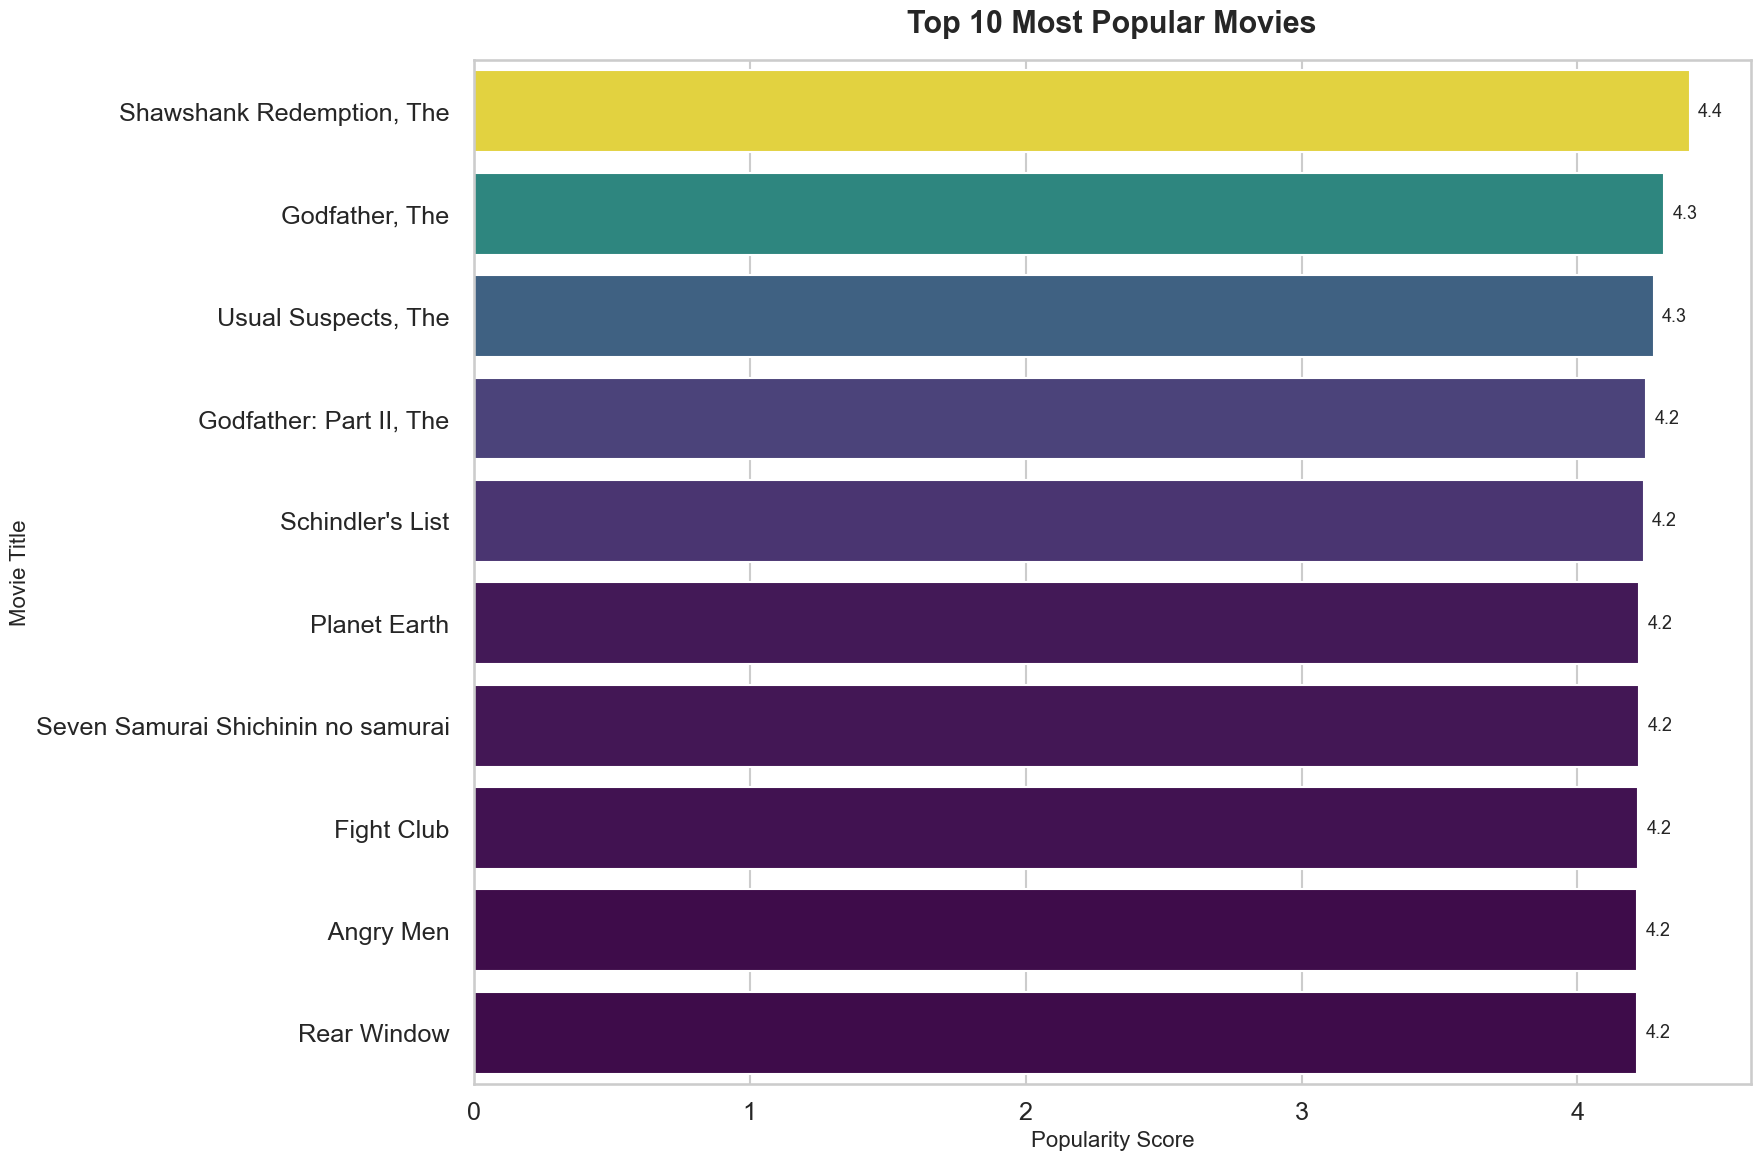

In [ ]:
sns.set_theme(style="whitegrid",context="talk",font_scale=1.1)
plt.figure(figsize=(18, 12))

ax = sns.barplot(x="Popularity_Score",y="title",data=top_Ten[0:10],palette="viridis",hue="Popularity_Score",legend=False)

ax.set_title("Top 10 Most Popular Movies",fontsize=22,weight="bold",pad=20)

ax.set_xlabel("Popularity Score", fontsize=16)
ax.set_ylabel("Movie Title", fontsize=16)

for container in ax.containers:
    ax.bar_label(container, fmt="%.1f", padding=6, fontsize=13)

plt.tight_layout()
plt.show()
